# Test Torch

In [1]:
import torch

def pearsonr(x, y):
    mean_x = torch.mean(x)
    mean_y = torch.mean(y)
    xm = x.sub(mean_x)
    ym = y.sub(mean_y)
    r_num = xm.dot(ym)
    r_den = torch.norm(xm, 2) * torch.norm(ym, 2)
    r_val = r_num / r_den
    return r_val

device = torch.device("cuda")

x = torch.rand(50000, device=device)
y = torch.rand(50000, device=device)
print(pearsonr(x, y))


tensor(0.0092, device='cuda:0')


# Linear Regration

<IPython.core.display.Javascript object>


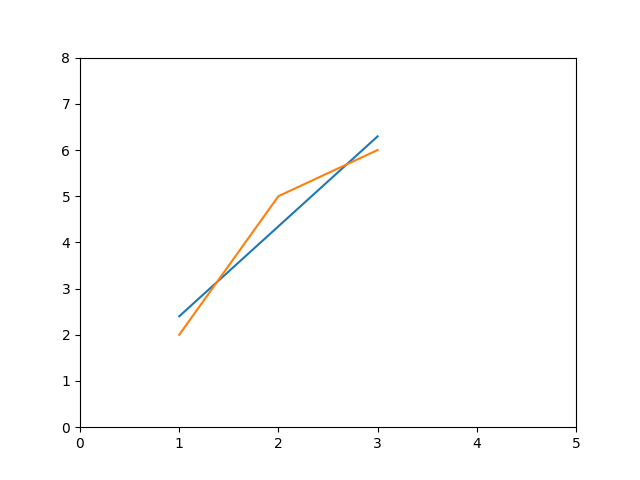

tensor(0.6727, grad_fn=<SumBackward0>)


NameError: name 'make_dot' is not defined

In [5]:
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
fig = plt.figure()


x = torch.tensor([1.0, 2.0, 3.0])
y = torch.tensor([2.0, 5.0, 6.0])

w0 = torch.tensor(10.0, requires_grad=True)
w1 = torch.tensor(-1.0, requires_grad=True)

yhat = w1 * x + w0
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.plot(x.detach(), yhat.detach(), x.detach(), y.detach())

for i in range(200):
    yhat = w1 * x + w0
    cost = torch.sum((yhat - y)**2)
    cost.backward() 
    with torch.no_grad():
        w0.sub_(w0.grad*0.03)
        w1.sub_(w1.grad*0.03)
        w0.grad.zero_()
        w1.grad.zero_()
    plt.cla()
    plt.xlim(0, 5)
    plt.ylim(0, 8)
    plt.plot(x.detach(), yhat.detach(), x.detach(), y.detach())
    fig.canvas.draw()
    time.sleep(0.1)
print(cost)
make_dot(cost)

## Learning Steps
0. Prepare data
1. Design model (input, output size, forward pass)
1. Construct loss and optimizeer
1. Training loop
     - forward pass: compute prediction and loss
     - backward pass: graadients
     - update weights

<IPython.core.display.Javascript object>


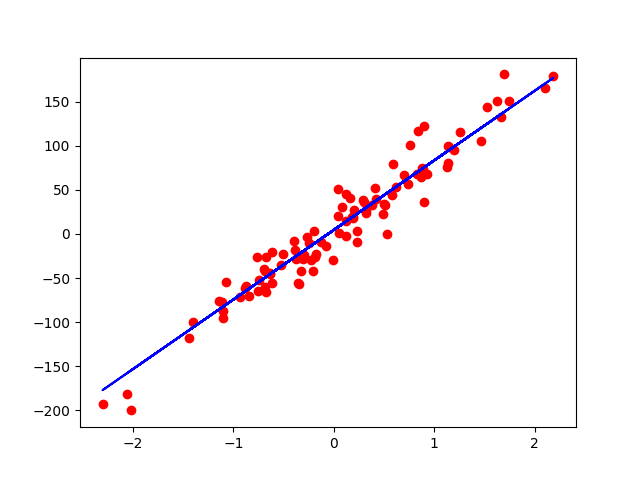

epoch: 10, loss=4443.1455
epoch: 20, loss=3314.0806
epoch: 30, loss=2497.0505
epoch: 40, loss=1905.1938
epoch: 50, loss=1476.0322
epoch: 60, loss=1164.5603
epoch: 70, loss=938.3148
epoch: 80, loss=773.8489
epoch: 90, loss=654.2079
epoch: 100, loss=567.1182
epoch: 110, loss=503.6859
epoch: 120, loss=457.4592
epoch: 130, loss=423.7542
epoch: 140, loss=399.1676
epoch: 150, loss=381.2253
epoch: 160, loss=368.1268
epoch: 170, loss=358.5609
epoch: 180, loss=351.5728
epoch: 190, loss=346.4662
epoch: 200, loss=342.7338


In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn import datasets

# 0 - prepare
x_np, y_np = datasets.make_regression(
    n_samples=100, n_features=1, noise=20, random_state=1)
x = torch.from_numpy(x_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = x.shape

# 1 - model
input_size  = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

# 2 - loss & optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3 - training loop
figure = plt.figure()
for epoch in range(1, 201):
    # forward
    y_predicted = model(x)
    loss = criterion(y_predicted, y)
    
    # backward
    loss.backward()
    
    # update
    optimizer.step()
    optimizer.zero_grad()
    
    # plot
    plt.cla()
    plt.plot(x_np, y_np,'ro')
    plt.plot(x_np, y_predicted.detach(),'b')
    figure.canvas.draw()
    
    if epoch % 10 == 0:
        print(f'epoch: {epoch}, loss={loss.item():.4f}')


# Logistic Regression

<IPython.core.display.Javascript object>


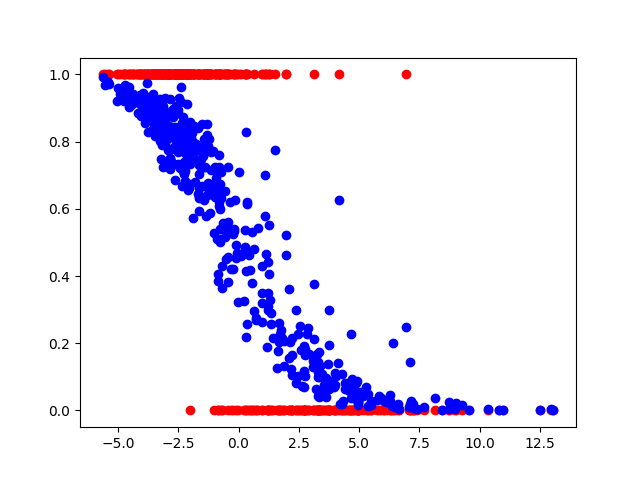

epoch: 10, loss=0.5802
epoch: 20, loss=0.4748
epoch: 30, loss=0.4090
epoch: 40, loss=0.3640
epoch: 50, loss=0.3310
epoch: 60, loss=0.3057
epoch: 70, loss=0.2854
epoch: 80, loss=0.2688
epoch: 90, loss=0.2548
epoch: 100, loss=0.2429
accuracy = 0.912


In [7]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# 0 - prepare data

bc = datasets.load_breast_cancer()
x, y = bc.data, bc.target

n_samples, n_features = x.shape

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train = torch.from_numpy(x_train.astype(np.float32))
x_test  = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test  = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test  = y_test.view(y_test.shape[0], 1)

# 1 - model f = sigmoid(wx+b)
class LogisticRegration(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.linear = nn.Linear(n_features, 1)
        
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

model = LogisticRegration(n_features)

# 2 - loss & optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3 - training loop
figure = plt.figure()

# get principal component
pca = PCA(n_components=1)
pca.fit(x_train.detach())
x_main = pca.transform(x_train)

for epoch in range(1, 101):
    # forward
    y_predicted = model(x_train)
    loss = criterion(y_predicted, y_train)
    
    # backward
    loss.backward()
    
    # update
    optimizer.step()
    optimizer.zero_grad()
    
    # plot
    plt.cla()
    plt.plot(x_main, y_train.detach(),'ro')
    plt.plot(x_main, y_predicted.detach(),'bo')
    figure.canvas.draw()
    
    if epoch % 10 == 0:
        print(f'epoch: {epoch}, loss={loss.item():.4f}')
        
with torch.no_grad():
    y_predicted = model(x_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.3}')

# Loading Data

In [ ]:
import torch
import torchvision
import numpy as np
import math

from torch.utils.data import Dataset, DataLoader

class WineDataset(Dataset):
    def __init__(self, transform=lambda x :x):
        data = np.loadtxt('file.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.x = data[:, 1:]
        self.y = data[:, [0]]
        self.n = data.shape[0] 
        self.transform = transform
        
    def __getitem__(self, i):
        return self.transform(self.x[i], self.y[i])
    
    def __len__(self):
        return self.n

class ToTensor:
    def __call__(self, smaple):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)
    

data = WineDataset(transform=ToTensor())
loader = DataLoader(dataset=data, batch_size=4, shuffle=True, num_workers=2)

n_epochs = 2
n_samples = len(data)
n_iterations = math.ceil(n_samples/4)

for epoch in range(n_epochs):
    for i, (inputs, labels) in enumerate(loader):
        # trainning
        # forward, backward and update weights
        pass
    
#torchvision.datasets.mnist.MNIST()
#torchvision.datasets.cifar.CIFAR10()
#torchvision.datasets.coco.CocoCaptions()

    
    

# Dataset Transforms [More](https://pytorch.org/docs/stable/torchvision/transforms.html)

In [ ]:
import torch
import torchvision

data = torchvision.datasets.MNIST(
    root='./data', transform=torchvision.transforms.ToTensor())



# Most Common Function
## Softmax

$ \Large S({y}_{i}) = \frac{e^{y_{i}}}{\sum e^{y_{i}}}  $

convert values to **[0.0, 1.0]** and **sum(...) = 1.0**


## Cross - Entropy

$ \large D({\hat Y, Y}) = - \frac{1}{N} \sum Y_{i}. log(\hat Y_{i})  $

compares two data sets

In [8]:
import torch
import torch.nn as nn
import numpy as np

# 
loss = nn.CrossEntropyLoss()

# 3 samples
Y = torch.tensor([2, 0, 1])

# nsamples x nclasses
Y_pred_good = torch.tensor([
    [0.1,1.0,2.1],
    [2.0,1.0,0.1],
    [0.1,1.0,0.1]
])
Y_pred_bad  = torch.tensor([
    [2.5,2.0,0.3],
    [0.5,2.0,3.3],
    [0.5,2.0,2.3]
])

l_good = loss(Y_pred_good, Y)
l_bad = loss(Y_pred_bad, Y)

print(l_good.item())
print(l_bad.item())

_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)

print(predictions1)
print(predictions2)


0.4653770923614502
2.257843255996704
tensor([2, 0, 1])
tensor([0, 2, 2])


# Activation Function


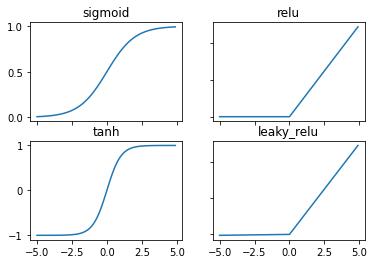

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as fn
import matplotlib.pyplot as plt
%matplotlib inline

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu    = nn.ReLU()
        
        # nn.Sigmoid
        # nn.Softmax
        # nn.Tanh
        # nn.LeakyReLU
        
        self.linear2 = nn.Linear(hidden_sizedden_size, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out
    

fig, axs = plt.subplots(2, 2)
x = torch.arange(-5, 5, 0.1)
axs[0, 0].set_title('sigmoid')
axs[0, 0].plot(x, torch.sigmoid(x))
axs[0, 1].set_title('relu')
axs[0, 1].plot(x, torch.relu(x))
axs[1, 0].set_title('tanh')
axs[1, 0].plot(x, torch.tanh(x))
axs[1, 1].set_title('leaky_relu')
axs[1, 1].plot(x, fn.leaky_relu(x))
for ax in fig.get_axes():
    ax.label_outer()


# FeedForward Net


torch.Size([100, 1, 28, 28]) torch.Size([100])
epoch 1/2, step 100/600, loss 0.4009
epoch 1/2, step 200/600, loss 0.2677
epoch 1/2, step 300/600, loss 0.3249
epoch 1/2, step 400/600, loss 0.1988
epoch 1/2, step 500/600, loss 0.2556
epoch 1/2, step 600/600, loss 0.2593
epoch 2/2, step 100/600, loss 0.2407
epoch 2/2, step 200/600, loss 0.1572
epoch 2/2, step 300/600, loss 0.0849
epoch 2/2, step 400/600, loss 0.2319
epoch 2/2, step 500/600, loss 0.1771
epoch 2/2, step 600/600, loss 0.0553
accuracy = 96.84


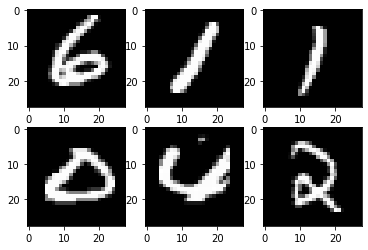

In [10]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
input_size  = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs  = 2
batch_size  = 100 
learning_rate = 0.001

# MNIST
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))])

train_data = torchvision.datasets.MNIST(
    root='./data', 
    train=True, transform=transform, download=True)

test_data = torchvision.datasets.MNIST(
    root='./data', 
    train=False, transform=transform, download=False)

train_loader = torch.utils.data.DataLoader(
    dataset=train_data, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    dataset=test_data, batch_size=batch_size, shuffle=False)

# test
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.imshow(samples[i][0], cmap='gray')
#plt.show()

# model 
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu    = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# loss & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            # reshape 100, 1, 28, 28 -> 100, 784
            images = images.reshape(-1, 784).to(device)
            labels = labels.to(device)
            
            # forward
            outs = model(images)
            loss = criterion(outs, labels)
            
            # backward 
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if (i+1) % 100 == 0:
                print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss {loss.item():.4f}')

# testing loop
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        # reshape 100, 1, 28, 28 -> 100, 784
        images  = images.reshape(-1, 784).to(device)
        labels  = labels.to(device)
        outputs = model(images)
        
        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions==labels).sum().item() 
        
    acc = 100.0 * n_correct/ n_samples
    print(f'accuracy = {acc}')
            
torch.save(model, 'models/mnist_ffn.pth' )


# Convolutional Nets

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as fn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib notebook

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
num_epochs  = 10
batch_size  = 100 
learning_rate = 0.001 

# dataset has PILImage images of range [0,1]
# we transforme them to tensors of normalized range [-1, 1]
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5,0.5), (0.5, 0.5,0.5))
])

# CIFAR10
train_data = torchvision.datasets.CIFAR10(
    root='./data', train=True, transform=transform, download=True)

test_data = torchvision.datasets.CIFAR10(
    root='./data', train=False, transform=transform, download=False)

train_loader = torch.utils.data.DataLoader(
    dataset=train_data, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    dataset=test_data, batch_size=batch_size, shuffle=False)

# labels
classes = (
    'plane', 'car' , 'bird' , 'car' , 'deer',
    'dog'  , 'frog', 'horse', 'ship', 'truck')

# model
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool  = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.linear1 = nn.Linear(16*5*5, 120)
        self.linear2 = nn.Linear(120, 84)
        self.linear3 = nn.Linear(84 , 10)
        
    
    def forward(self, x):
        x = self.pool(fn.relu(self.conv1(x)))
        x = self.pool(fn.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = fn.relu(self.linear1(x))
        x = fn.relu(self.linear2(x))
        x = self.linear3(x)
        return x
        
model = ConvNet().to(device)

    
# loss & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
figure = plt.figure()
n_total_steps = len(train_loader)
y_loss = []
print(n_total_steps)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # reshape: 4, 3, 32, 32 -> 4, 3, 1024
        images = images.to(device)
        labels = labels.to(device)

        # forward
        outs = model(images)
        loss = criterion(outs, labels)

        # backward & optimizer step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # information
        if (i+1) % 200 == 0:
            # plot
            y_loss.append(loss.item())
            plt.cla()
            plt.plot(y_loss)
            figure.canvas.draw()
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss {loss.item():.4f}')

print('training ended')

# testing loop
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        # reshape: 4, 3, 32, 32 -> 4, 3, 1024
        images  = images.to(device)
        labels  = labels.to(device)
        outputs = model(images)
        
        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions==labels).sum().item() 
        
        
    acc = 100.0 * n_correct/ n_samples
    print(f'accuracy = {acc}')
            

  

# Transfer Learning

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import copy

from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms

mean = np.array([0.5, 0.5, 0.5])
std  = np.array([0.25, 0.25, 0.25])

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

data_dir = 'data/hymenoptera_data'

image_datasets = {
    x:datasets.ImageFolder(
        os.path.join(data_dir, x), data_transforms[x])
    for x in ['train', 'val']
}
dataloaders = {
    x:torch.utils.data.DataLoader(
        image_datasets[x], batch_size=4,shuffle=True, num_workers=0)
    for x in ['train', 'val']
}

dataset_sizes = {x:len(image_datasets[x]) for x in ['train', 'val']}

class_names   = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(class_names)


def imshow(inp, title):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.title(title)
    plt.show()


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


#### Finetuning the convnet ####
# Load a pretrained model and reset final fully connected layer.

model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model.fc = nn.Linear(num_ftrs, 2)

model = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.001)

# StepLR Decays the learning rate of each parameter group by gamma every step_size epochs
# Decay LR by a factor of 0.1 every 7 epochs
# Learning rate scheduling should be applied after optimizer’s update
# e.g., you should write your code this way:
# for epoch in range(100):
#     train(...)
#     validate(...)
#     scheduler.step()

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=25)


#### ConvNet as fixed feature extractor ####
# Here, we need to freeze all the network except the final layer.
# We need to set requires_grad == False to freeze the parameters so that the gradients are not computed in backward()
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25) 

# Save and Load

In [ ]:
import torch

torch.save(model, 'models/model.pth')
